In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#read the three tables
based_customer = pd.read_csv('../Case_Study_Data/cleaned_based_customer_data.csv')

customer_opportunity = pd.read_csv('../Case_Study_Data/customer_opportunity_cleaned.csv')

product_mapping = pd.read_csv('../Case_Study_Data/product_mapping_cleaned.csv')


In [10]:
# using numpy to convert datetime for columns needed for my analysis 
date_columns = ['PURSUIT_START_DATE', 'DATE_WON_LOSS_ABANDONED', 'PROJECT_START_DATE', 'PROJECT_END_DATE']
for column in date_columns:
    customer_opportunity[column] = pd.to_datetime(customer_opportunity[column], errors='coerce')
    
customer_opportunity['PURSUIT_START_DATE'] = pd.to_datetime(customer_opportunity['PURSUIT_START_DATE'])
customer_opportunity['DATE_WON_LOSS_ABANDONED'] = pd.to_datetime(customer_opportunity['DATE_WON_LOSS_ABANDONED'])

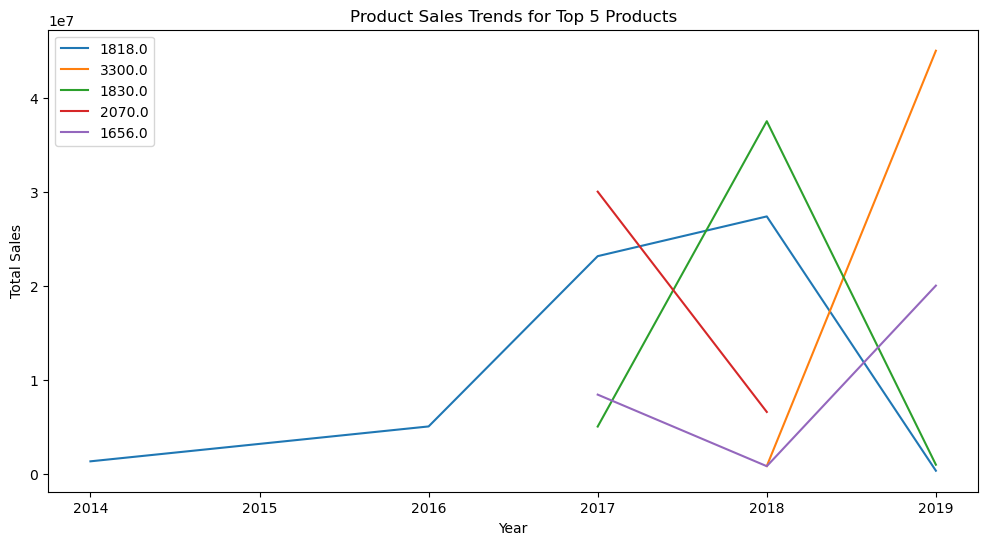

In [11]:
# Extract the year from the 'PURSUIT_START_DATE' column
customer_opportunity['Year'] = customer_opportunity['PURSUIT_START_DATE'].dt.year

product_sales = customer_opportunity.groupby(['Product_Category4_id', 'Year']).agg({'Total_Sales': 'sum'}).reset_index()

# Find the top 5 products by total sales
top_5_products = product_sales.groupby('Product_Category4_id')['Total_Sales'].sum().nlargest(5).index

# Plot sales trends for the top 5 products
plt.figure(figsize=(12, 6))
for category in top_5_products:
    category_data = product_sales[product_sales['Product_Category4_id'] == category]
    plt.plot(category_data['Year'], category_data['Total_Sales'], label=category)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Product Sales Trends for Top 5 Products')
plt.legend()
plt.show()

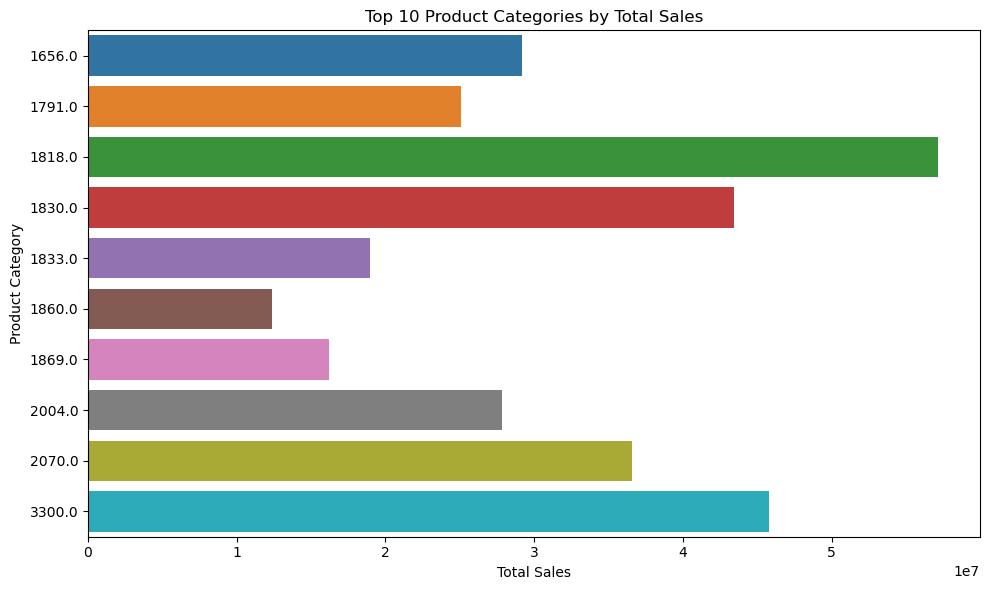

In [18]:
# Group opportunities by Product Category and calculate total sales and weighted sales
product_focus = customer_opportunity.groupby("Product_Category4_id").agg(
    total_sales=("Total_Sales", "sum"),
    weighted_sales=("WEIGHTED_Sales", "sum")
)

# Sort products by total sales and get the top 10 
top_product_focus = product_focus.sort_values(by="total_sales", ascending=False).head(10)

# Set a figure size that accommodates the labels
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
sns.barplot(x="total_sales", y=top_product_focus.index, data=top_product_focus, orient="h")

plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")

# Adjust the layout to fit the labels
plt.tight_layout()

plt.show()


In [31]:
#merging based customer with customer opportunity on customer column using inner join 
merged_case_study_df = pd.merge(based_customer, customer_opportunity, on='customer', how='inner')
merged_case_study_df.head()
# merged_case_study_df.shape
merged_case_study_df.columns

Index(['SNAPSHOT_FISCAL_YEAR', 'SNAPSHOT_FISCAL_YEAR_PERIOD_x', 'customer',
       'customer_TEXT', 'customer_INDUSTRY_DESC', 'customer_OFFICE_DESC',
       'customer_REGION_DESC', 'customer_SECTOR_DESC', 'customer_SIC_TEXT',
       'customer_SUB_SECTOR_DESC', 'OPPORTUNITY_OPEN_CLOSED_INDICATOR',
       'PHASE_NAME', 'PURSUIT_START_DATE', 'PROJECT_START_DATE',
       'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED',
       'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'Product_Category4_id',
       'Product_Category2_text', 'Product_Category3_text', 'PURSUIT_LEADER',
       'BUYER_ROLE_DESC', 'CURRENCY', 'PROBABILITY_PRC', 'WEIGHTED_Sales',
       'Total_Sales', 'STRATEGIC_OPPORTUNITY', 'SNAPSHOT_FY', 'SNAPSHOT_FP',
       'SNAPSHOT_FISCAL_YEAR_PERIOD_y', 'OPPORTUNITY_ID', 'Year'],
      dtype='object')

In [35]:
merged_case_study_df.to_csv('merged_case_study_df.csv', index=False)  


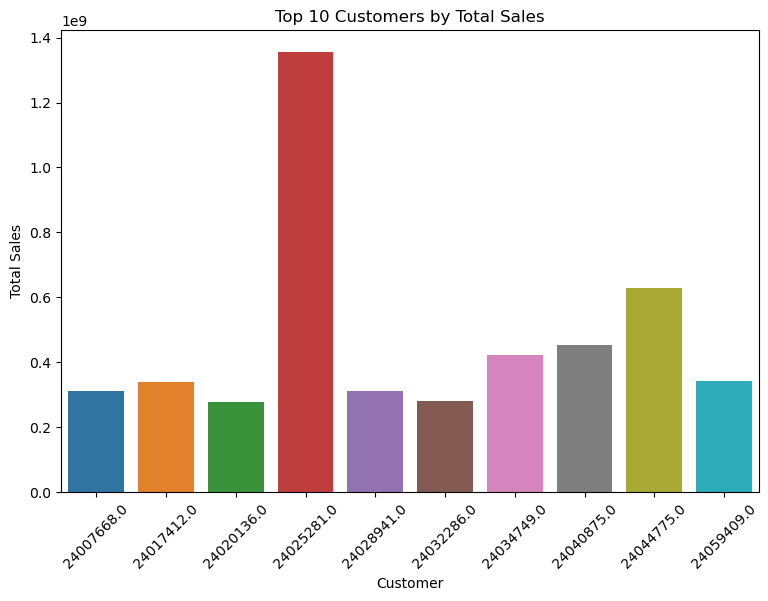

In [60]:
customer_sales = merged_case_study_df.groupby('customer')['Total_Sales'].sum().reset_index()

# Sort customers by total sales in descending order
customer_sales = customer_sales.sort_values(by='Total_Sales', ascending=False)

# Visualization
plt.figure(figsize=(9, 6))
sns.barplot(x='customer', y='Total_Sales', data=customer_sales[:10])
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

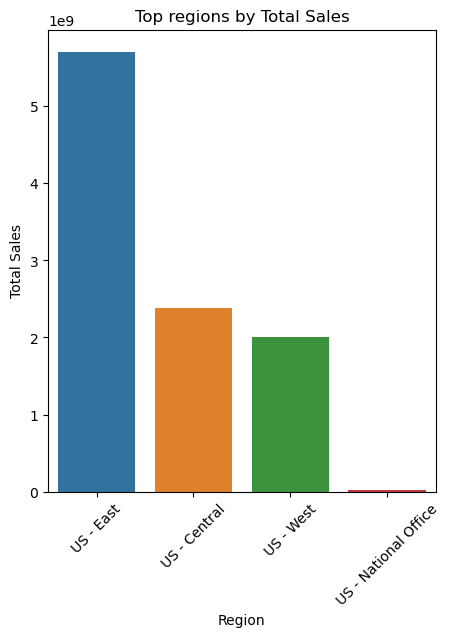

In [59]:
region_sales = merged_case_study_df.groupby('customer_REGION_DESC')['Total_Sales'].sum().reset_index()

# Sort customers by total sales in descending order
region_sales = region_sales.sort_values(by='Total_Sales', ascending=False)

# Visualization
plt.figure(figsize=(5, 6))
sns.barplot(x='customer_REGION_DESC', y='Total_Sales', data=customer_sales)
plt.title("Top regions by Total Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

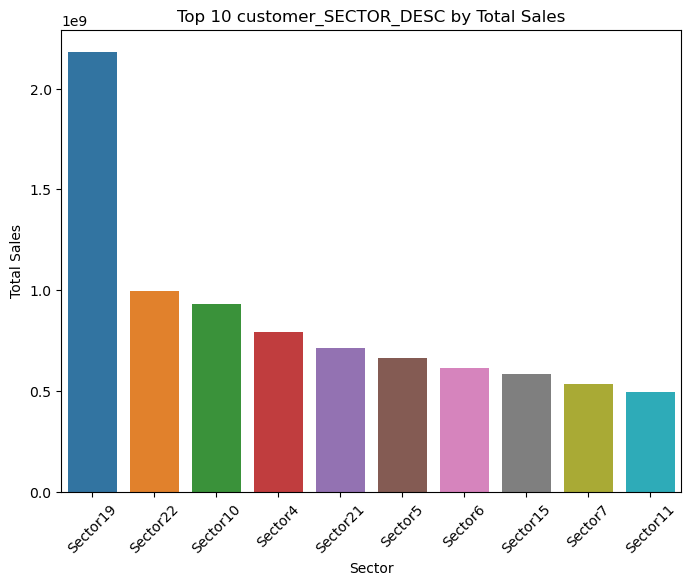

In [58]:

SECTOR_DESC = merged_case_study_df.groupby('customer_SECTOR_DESC')['Total_Sales'].sum().reset_index()

# Sort customers by total sales in descending order
SECTOR_DESC = SECTOR_DESC.sort_values(by='Total_Sales', ascending=False)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_SECTOR_DESC', y='Total_Sales', data=SECTOR_DESC[:10])
plt.title("Top 10 customer_SECTOR_DESC by Total Sales")
plt.xlabel("Sector")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

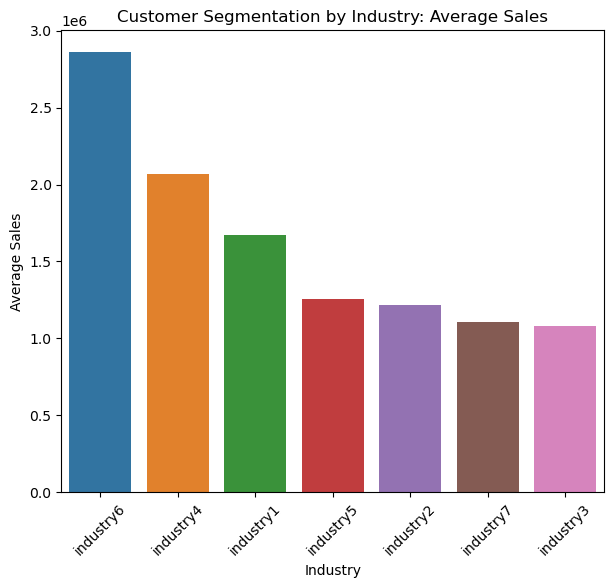

In [57]:
industry_segments = merged_case_study_df.groupby('customer_INDUSTRY_DESC')

# Calculate average sales and success rate for each segment
segment_metrics = industry_segments.agg({
    'Total_Sales': 'mean',
    'OPPORTUNITY_OPEN_CLOSED_INDICATOR': (lambda x: (x == 'Won').mean())
}).reset_index()

# Prioritize segments based on desired criteria
priority_segments = segment_metrics.sort_values(by=['Total_Sales', 'OPPORTUNITY_OPEN_CLOSED_INDICATOR'], ascending=[False, False])

# Visualization
plt.figure(figsize=(7, 6))
sns.barplot(x='customer_INDUSTRY_DESC', y='Total_Sales', data=priority_segments)
plt.title("Customer Segmentation by Industry: Average Sales")
plt.xlabel("Industry")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()

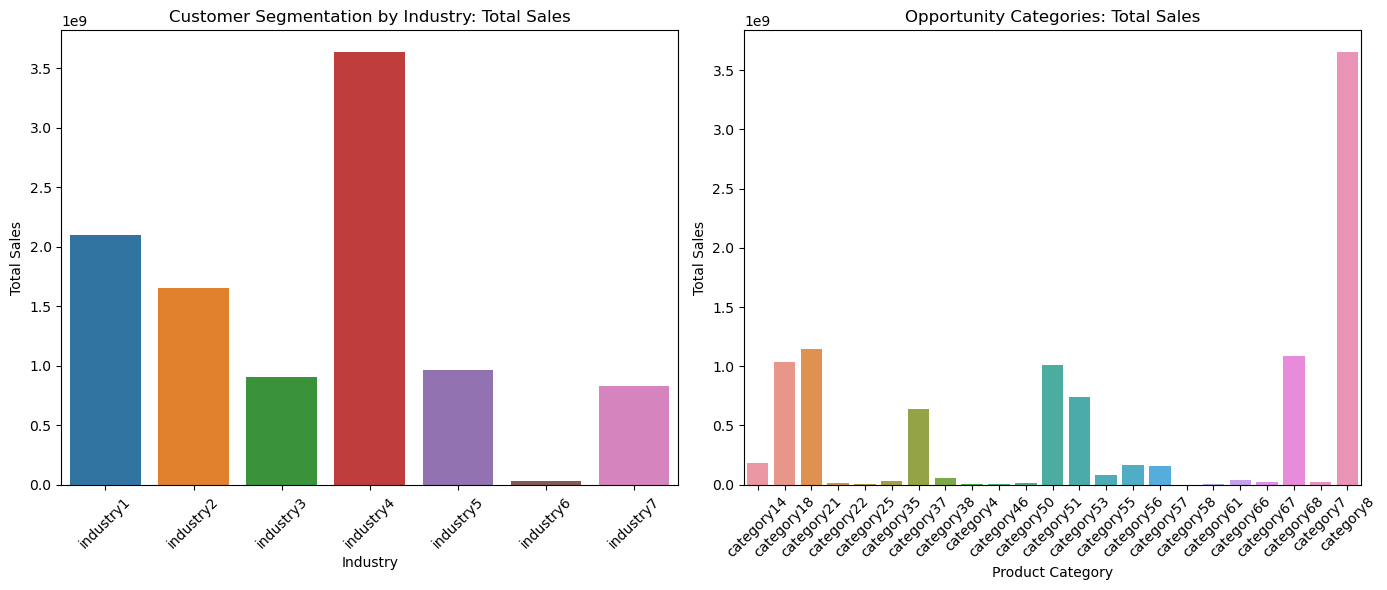

In [61]:
# Customer Segmentation
customer_segments = merged_case_study_df.groupby('customer_INDUSTRY_DESC')
customer_metrics = customer_segments.agg({
    'Total_Sales': 'sum',
    'OPPORTUNITY_OPEN_CLOSED_INDICATOR': (lambda x: (x == 'Won').mean())
}).reset_index()

# Opportunity Analysis
opportunity_categories = merged_case_study_df.groupby('Product_Category2_text')
opportunity_metrics = opportunity_categories.agg({
    'Total_Sales': 'sum',
    'OPPORTUNITY_OPEN_CLOSED_INDICATOR': (lambda x: (x == 'Won').mean())
}).reset_index()

# Visualization for Customer and Opportunity Insights
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='customer_INDUSTRY_DESC', y='Total_Sales', data=customer_metrics)
plt.title("Customer Segmentation by Industry: Total Sales")
plt.xlabel("Industry")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Product_Category2_text', y='Total_Sales', data=opportunity_metrics)
plt.title("Opportunity Categories: Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()